In [8]:
# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, roc_auc_score)

In [9]:
from google.colab import files
uploaded = files.upload()

Saving Heart Disease.csv to Heart Disease (1).csv


In [10]:
# 2. Load Dataset
df = pd.read_csv('/content/Heart Disease.csv')
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease (in next 10 years)
0,Male,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
# 3. Data Preprocessing
df = df.dropna().copy()
df.head()

# Encode categorical variables
categorical_columns = ['gender', 'education', 'currentSmoker', 'BPMeds',
                       'prevalentStroke', 'prevalentHyp', 'diabetes']

le = LabelEncoder()
for col in categorical_columns:
    df.loc[:, col] = le.fit_transform(df[col])

# Separate features and target
X = df.drop('Heart Disease (in next 10 years)', axis=1)
y = df['Heart Disease (in next 10 years)']

In [12]:
# 4. Train-Test Split + Feature Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Initialize Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# To store results
results = {}

# Train, Predict and Evaluate
for name, model in models.items():
    print(f"\n🔍 Evaluating {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]  # Probabilities for AUC

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print("Confusion Matrix:\n", cm)
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1 Score:", f1)
    print("AUC Score:", auc)

    # Save all results
    results[name] = {
        "Model": model,
        "y_pred": y_pred,
        "y_prob": y_prob,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "AUC": auc
    }


🔍 Evaluating Logistic Regression
Confusion Matrix:
 [[606   4]
 [113   9]]
Accuracy: 0.8401639344262295
Precision: 0.6923076923076923
Recall: 0.07377049180327869
F1 Score: 0.13333333333333333
AUC Score: 0.7328675087342114

🔍 Evaluating Decision Tree
Confusion Matrix:
 [[508 102]
 [ 97  25]]
Accuracy: 0.7281420765027322
Precision: 0.1968503937007874
Recall: 0.20491803278688525
F1 Score: 0.20080321285140562
AUC Score: 0.5188524590163934

🔍 Evaluating KNN
Confusion Matrix:
 [[598  12]
 [114   8]]
Accuracy: 0.8278688524590164
Precision: 0.4
Recall: 0.06557377049180328
F1 Score: 0.11267605633802817
AUC Score: 0.6136119322762699

🔍 Evaluating Random Forest
Confusion Matrix:
 [[607   3]
 [116   6]]
Accuracy: 0.837431693989071
Precision: 0.6666666666666666
Recall: 0.04918032786885246
F1 Score: 0.0916030534351145
AUC Score: 0.7099166890620799


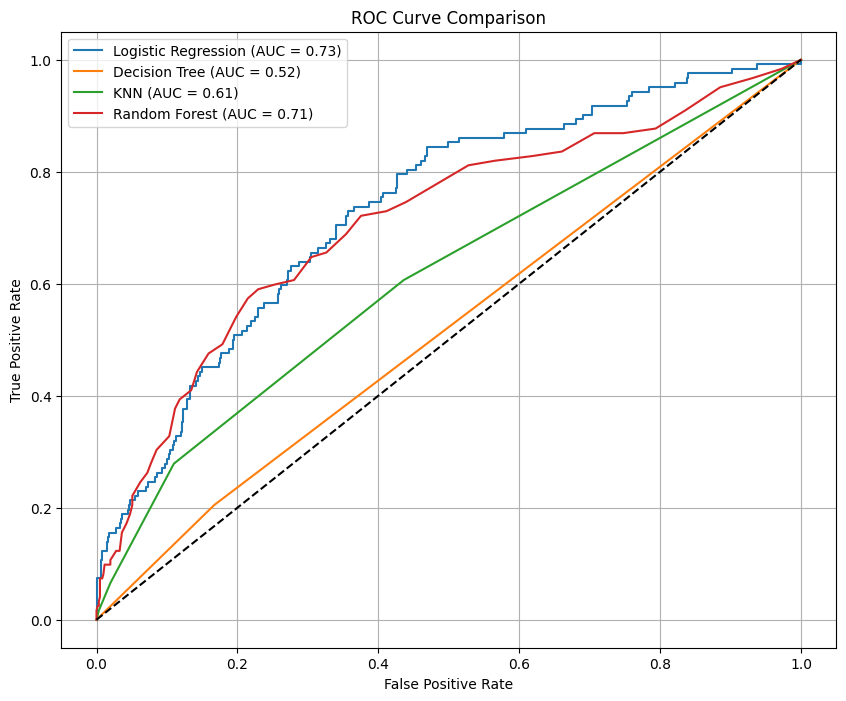

In [14]:
# Plot ROC curves for comparison
plt.figure(figsize=(10, 8))

for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res["y_prob"])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {res["AUC"]:.2f})')

plt.plot([0,1], [0,1], linestyle='--', color='black')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()